In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2

from random import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier

In [3]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog' : return 1
    elif word_label == 'cat' : return 0

In [4]:
train_data = []
train_label = []
for img in os.listdir(r'C:\Users\guyit\Desktop\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\guyit\Desktop\train',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(28,28))
    train_data.append(np.array(img).flatten())
    train_label.append(label)
np.save('training_data.npy',train_data)
np.save('training_label.npy',train_label)

In [5]:
cols = []
for i in range(784):
    cols.append("pixel_"+str(i))

In [6]:
df = pd.DataFrame(train_data,columns=cols)
df['label']=train_label
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,173,187,197,204,209,215,184,165,143,96,...,28,4,9,34,28,9,2,3,3,0
1,36,44,41,40,41,53,67,64,62,73,...,62,26,33,71,53,87,57,52,42,0
2,56,58,62,61,56,50,48,43,48,56,...,106,147,63,76,68,72,131,145,172,0
3,222,236,226,228,231,223,231,224,216,208,...,159,178,255,251,237,223,208,209,212,0
4,99,82,145,198,222,237,202,236,85,136,...,92,97,92,86,86,85,76,85,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,143,147,149,152,154,158,159,160,163,165,...,157,169,135,159,163,163,164,167,168,1
24996,68,128,89,84,69,104,106,82,113,68,...,49,11,20,27,72,94,82,73,82,1
24997,29,43,26,66,136,141,50,85,59,133,...,214,137,109,161,132,159,121,164,147,1
24998,245,188,110,111,73,111,161,62,87,119,...,135,143,119,113,89,97,97,83,119,1


the labels are:
- 0 cat
- 1 dog

In [136]:
some_instance = np.array(df[:1].drop('label',axis=1))
some_instance_image = some_instance.reshape(28, 28)

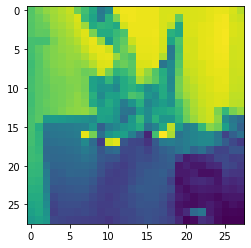

In [137]:
plt.imshow(some_instance_image)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 785 entries, pixel_0 to label
dtypes: int64(785)
memory usage: 149.7 MB


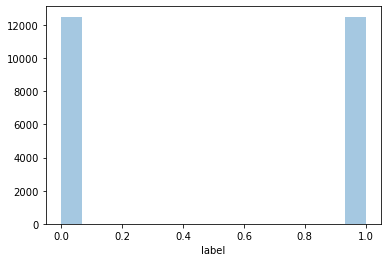

In [162]:
sns.distplot(df['label'],kde= False)

In [7]:
target=df['label']
data=df.drop(['label'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data,target ,random_state=0)

In [164]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [167]:
rfc.feature_importances_

array([0.0012072 , 0.0009263 , 0.00100172, 0.00108912, 0.00106676,
       0.00108161, 0.000978  , 0.00088772, 0.00090105, 0.0010968 ,
       0.00106896, 0.00102715, 0.00111839, 0.00110629, 0.0010166 ,
       0.00107132, 0.00098879, 0.00104371, 0.00102741, 0.00112598,
       0.00108937, 0.00094194, 0.00103583, 0.00108385, 0.00112462,
       0.00104074, 0.00094324, 0.00111315, 0.0009152 , 0.00105014,
       0.00091166, 0.00096448, 0.0010722 , 0.00096907, 0.00106601,
       0.00105263, 0.00103602, 0.00096388, 0.00109673, 0.00100028,
       0.00117158, 0.00111783, 0.00099296, 0.00106184, 0.00104447,
       0.00109759, 0.00092338, 0.00099728, 0.00098901, 0.00100129,
       0.00104182, 0.00111367, 0.00105765, 0.0009373 , 0.00106399,
       0.00090644, 0.00103153, 0.00105322, 0.0010498 , 0.00110342,
       0.00111402, 0.0010164 , 0.00118419, 0.00105605, 0.00115064,
       0.00124466, 0.00123213, 0.00117649, 0.00109406, 0.00112006,
       0.0011649 , 0.00112965, 0.00107037, 0.00121005, 0.00096

In [168]:
def plot_instance(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.hot,
               interpolation="nearest")
    plt.axis("off")

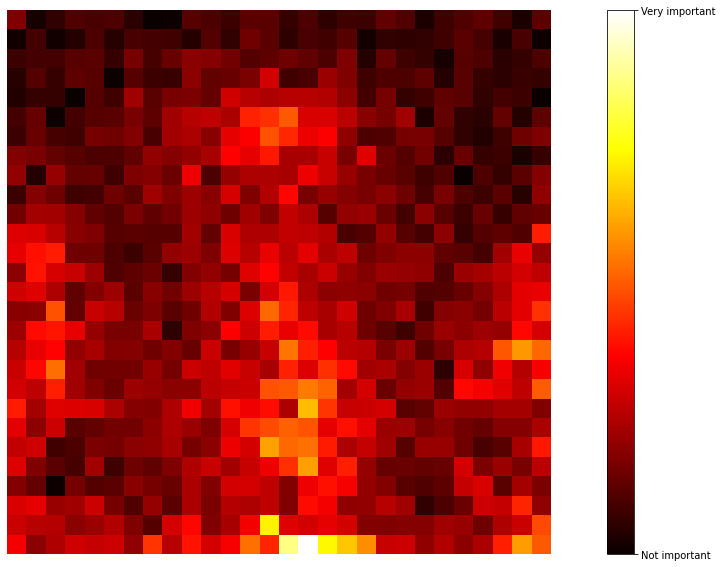

In [169]:
plt.figure(figsize=(20, 10))
plot_instance(rfc.feature_importances_)
cbar = plt.colorbar(ticks=[rfc.feature_importances_.min(), rfc.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [8]:
sc= StandardScaler()

In [9]:
scaled_train = sc.fit_transform(X_train)

In [10]:
scaled_test = sc.transform(X_test)

In [173]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,y_train)
rfc

RandomForestClassifier()

In [174]:
y_pred = rfc.predict(scaled_test)

In [175]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      3149
           1       0.64      0.61      0.63      3101

    accuracy                           0.64      6250
   macro avg       0.64      0.64      0.64      6250
weighted avg       0.64      0.64      0.64      6250



Text(33.0, 0.5, 'Actual')

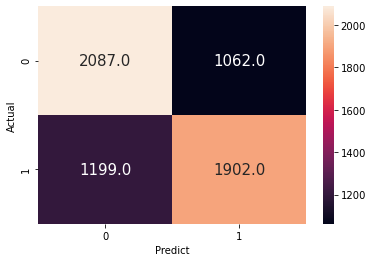

In [181]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [11]:
pca = PCA()
pca.fit(scaled_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

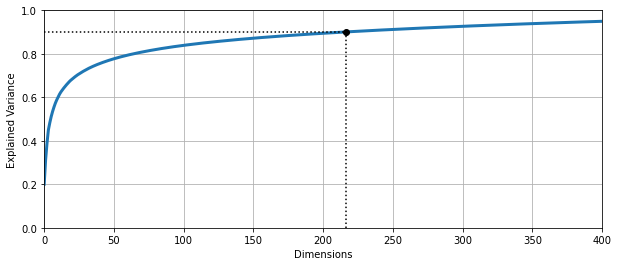

In [12]:
plt.figure(figsize=(10,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.9], "k:")
plt.plot([0, d], [0.9, 0.9], "k:")
plt.plot(d, 0.9, "ko")
plt.grid(True)
plt.show()

In [13]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
pca = PCA(n_components=0.9)

In [14]:
redueced_train = pca.fit_transform(scaled_train)

In [15]:
redueced_train.shape

(18750, 216)

In [16]:
X_test_reduced = pca.transform(scaled_test)
X_test_reduced.shape

(6250, 216)

In [17]:
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])

In [18]:
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])

In [19]:
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])

In [206]:
param_knn = {
    'knn__n_neighbors': list(range(2,11,2)),
    'knn__weights': ['uniform','distance']  
}

In [207]:
path = dtc.cost_complexity_pruning_path(redueced_train,y_train)
alphas = path.ccp_alphas

In [208]:
param_dtc = {'dtc__ccp_alpha':alphas}

In [209]:
param_rfc = {'rfc__n_estimators':[100,200,300,400,500],
    'rfc__max_depth' : list(range(2,21,2))}

In [210]:
grid_knn = RandomizedSearchCV(pipe_knn,param_knn,scoring='accuracy')
grid_dtc = RandomizedSearchCV(pipe_dtc,param_dtc,scoring='accuracy')
grid_rfc = RandomizedSearchCV(pipe_rfc,param_rfc,scoring='accuracy')

In [211]:
grid_knn.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': [2, 4, 6, 8, 10],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='accuracy')

In [214]:
grid_dtc.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('dtc',
                                              DecisionTreeClassifier())]),
                   param_distributions={'dtc__ccp_alpha': array([0.00000000e+00, 5.09090909e-05, 5.15555556e-05, ...,
       3.38112209e-03, 4.32563647e-03, 6.46794246e-03])},
                   scoring='accuracy')

In [217]:
grid_rfc.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   param_distributions={'rfc__max_depth': [2, 4, 6, 8, 10, 12,
                                                           14, 16, 18, 20],
                                        'rfc__n_estimators': [100, 200, 300,
                                                              400, 500]},
                   scoring='accuracy')

In [212]:
grid_knn.best_score_

0.58968

In [213]:
grid_knn.best_params_

{'knn__weights': 'distance', 'knn__n_neighbors': 10}

In [215]:
grid_dtc.best_score_

0.57452

In [216]:
grid_dtc.best_params_

{'dtc__ccp_alpha': 0.0003748628587666933}

In [218]:
grid_rfc.best_score_

0.6364

In [219]:
grid_rfc.best_params_

{'rfc__n_estimators': 500, 'rfc__max_depth': 14}

In [220]:
vot = VotingClassifier(estimators=[('dtc', grid_dtc.best_estimator_), ('knn', grid_knn.best_estimator_), ('rfc', grid_rfc.best_estimator_)],
voting='soft')

In [221]:
cross_val_score(vot,data,target,scoring='accuracy').mean()

0.613

In [20]:
xg = XGBClassifier(use_label_encoder=False,eval_metric= 'mlogloss')

In [21]:
pipe_xg = Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])

In [227]:
cross_val_score(pipe_xg,data,target,scoring='accuracy').mean()

0.6244799999999999

In [228]:
vot2 = VotingClassifier(estimators=[('pipe_xg', pipe_xg), ('rfc', grid_rfc.best_estimator_)],
voting='soft')

In [229]:
cross_val_score(vot2,data,target,scoring='accuracy').mean()

0.6347200000000001

In [22]:
rfc = RandomForestClassifier(n_estimators=500,max_depth=14)
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])

In [23]:
stc = StackingClassifier(estimators=[('xg', pipe_xg), ('rfc', pipe_rfc)])

In [24]:
cross_val_score(stc,data,target,scoring='accuracy').mean()

0.64304

In [25]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance')
dtc = DecisionTreeClassifier(ccp_alpha= 0.0003748628587666933)
rfc = RandomForestClassifier(n_estimators=500,max_depth=14)
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])

In [26]:
stc2 = StackingClassifier(estimators=[('xg', pipe_xg), ('rfc', pipe_rfc),('knn', knn),('dtc', dtc)])

In [27]:
cross_val_score(stc2,data,target,scoring='accuracy').mean()

0.6463599999999999